In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('CO2_emission.csv')

In [3]:
df.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7


In [4]:
df.shape

(935, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Model_Year                              935 non-null    int64  
 1   Make                                    935 non-null    object 
 2   Model                                   935 non-null    object 
 3   Vehicle_Class                           935 non-null    object 
 4   Engine_Size                             935 non-null    float64
 5   Cylinders                               935 non-null    int64  
 6   Transmission                            935 non-null    object 
 7   Fuel_Consumption_in_City(L/100 km)      935 non-null    float64
 8   Fuel_Consumption_in_City_Hwy(L/100 km)  935 non-null    float64
 9   Fuel_Consumption_comb(L/100km)          935 non-null    float64
 10  CO2_Emissions                           935 non-null    int64 

In [6]:
df.describe(include='all')

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
count,935.0,935,935,935,935.000000,935.000000,935,935.000000,935.000000,935.000000,935.000000,935.000000
unique,NaN,38,703,15,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN
top,NaN,Ford,Silverado 4WD,SUV: Small,NaN,NaN,AS8,NaN,NaN,NaN,NaN,NaN
freq,NaN,87,7,192,NaN,NaN,206,NaN,NaN,NaN,NaN,NaN
mean,2021.0,NaN,NaN,NaN,3.214866,5.716578,NaN,12.498610,9.306203,11.060214,258.529412,4.726203
std,0.0,NaN,NaN,NaN,1.388513,1.977359,NaN,3.487271,2.215819,2.867028,64.442768,1.712127
min,2021.0,NaN,NaN,NaN,1.000000,3.000000,NaN,4.000000,3.900000,4.000000,94.000000,1.000000
25%,2021.0,NaN,NaN,NaN,2.000000,4.000000,NaN,10.100000,7.700000,9.100000,213.000000,3.000000
50%,2021.0,NaN,NaN,NaN,3.000000,6.000000,NaN,12.000000,9.000000,10.700000,255.000000,5.000000
75%,2021.0,NaN,NaN,NaN,4.000000,8.000000,NaN,14.800000,10.800000,13.100000,303.500000,6.000000


In [7]:
df.drop('Model_Year',inplace=True,axis=1)

In [8]:
df['Make'].value_counts()

Ford             87
Chevrolet        84
Mercedes-Benz    72
Porsche          63
GMC              61
BMW              54
Toyota           49
Audi             43
Jeep             36
Mazda            29
Hyundai          27
Lexus            27
Kia              25
Honda            23
MINI             22
Nissan           22
Dodge            22
Cadillac         22
Ram              16
Volkswagen       16
Subaru           16
Volvo            13
Maserati         11
Rolls-Royce      10
Lamborghini       9
Buick             9
Bentley           8
Genesis           8
Lincoln           7
Acura             6
Alfa Romeo        6
Infiniti          6
Chrysler          6
Aston Martin      6
Jaguar            6
Mitsubishi        5
Bugatti           2
FIAT              1
Name: Make, dtype: int64

In [9]:
df['Model'].value_counts()

Silverado 4WD                    7
Sierra 4WD                       7
Sierra                           5
Silverado                        5
Mustang                          5
                                ..
Terrain AWD                      1
Yukon (Without Stop-Start)       1
Yukon XL (Without Stop-Start)    1
Accord                           1
XC90 T6 AWD                      1
Name: Model, Length: 703, dtype: int64

In [10]:
df['Vehicle_Class'].value_counts()

SUV: Small                 192
SUV: Standard              127
Pickup truck: Standard     115
Mid-size                   114
Compact                     83
Subcompact                  83
Full-size                   65
Two-seater                  56
Minicompact                 30
Station wagon: Small        20
Pickup truck: Small         17
Special purpose vehicle     13
Station wagon: Mid-size      9
Minivan                      7
Van: Passenger               4
Name: Vehicle_Class, dtype: int64

In [11]:
df['Cylinders'].value_counts()

4     407
6     265
8     213
12     21
3      18
10      8
16      2
5       1
Name: Cylinders, dtype: int64

In [12]:
df['Transmission'].value_counts()

AS8     206
A9       95
A8       92
AS10     77
AM7      70
M6       67
A10      59
AS6      56
AM8      44
AV       41
A6       36
AV8      15
AS9      14
AV7      11
AM6       9
M7        9
AV6       9
AS7       7
AV10      6
M5        5
AV1       4
AS5       2
AM9       1
Name: Transmission, dtype: int64

In [13]:
df.columns

Index(['Make', 'Model', 'Vehicle_Class', 'Engine_Size', 'Cylinders',
       'Transmission', 'Fuel_Consumption_in_City(L/100 km)',
       'Fuel_Consumption_in_City_Hwy(L/100 km)',
       'Fuel_Consumption_comb(L/100km)', 'CO2_Emissions', 'Smog_Level'],
      dtype='object')

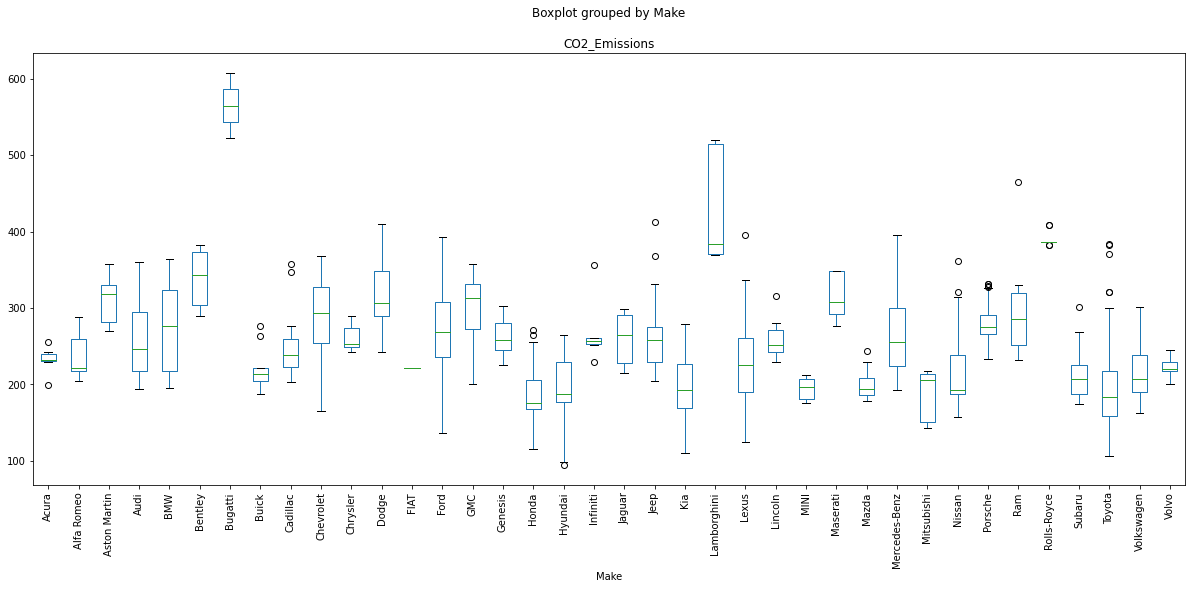

In [14]:
df.boxplot(by ='Make', column =['CO2_Emissions'], grid = False, figsize=(20, 8))
plt.xticks(rotation=90);

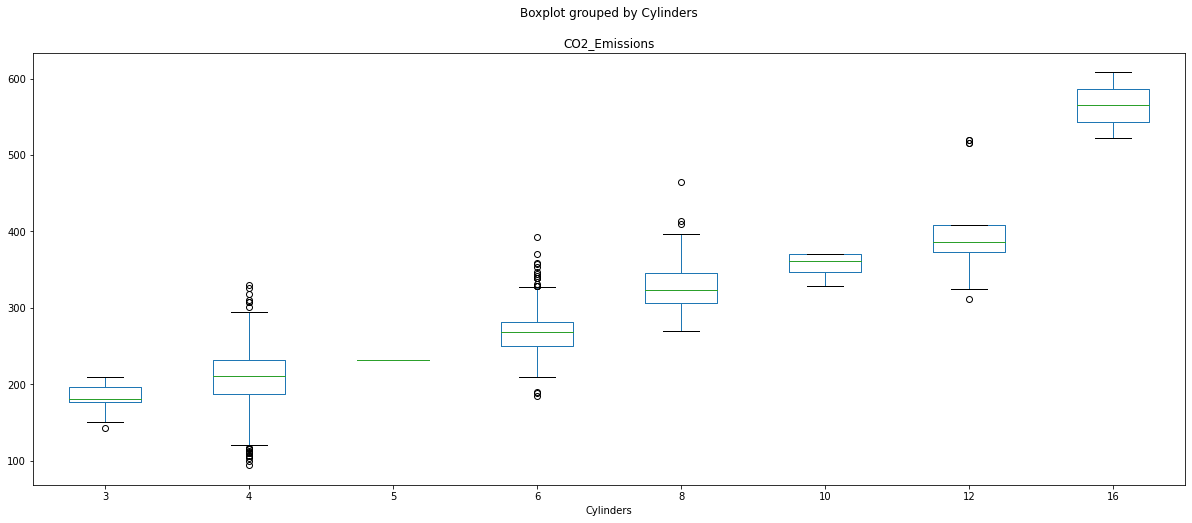

In [15]:
df.boxplot(by ='Cylinders', column =['CO2_Emissions'], grid = False, figsize=(20, 8));

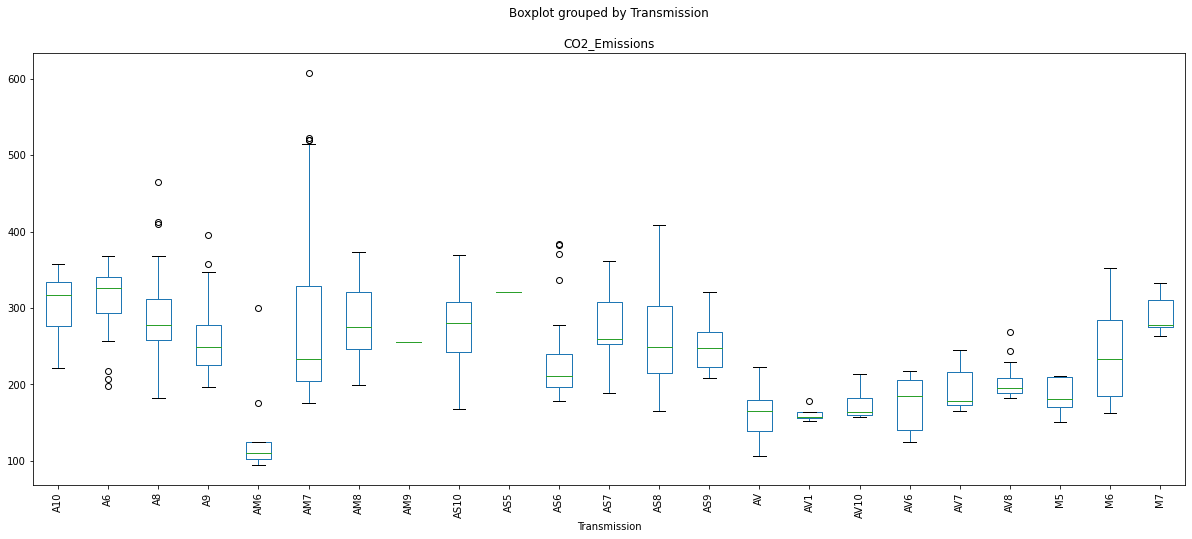

In [16]:
df.boxplot(by ='Transmission', column =['CO2_Emissions'], grid = False, figsize=(20, 8))
plt.xticks(rotation=90);

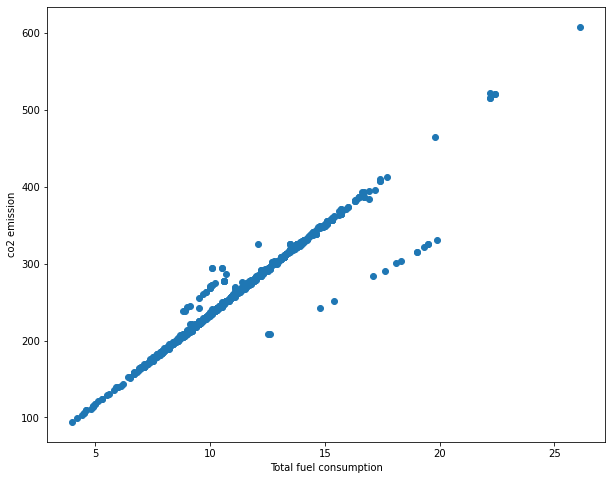

In [17]:
plt.subplots(figsize=(10, 8))

plt.scatter(df['Fuel_Consumption_comb(L/100km)'],df['CO2_Emissions'])

plt.xlabel("Total fuel consumption")
plt.ylabel("co2 emission")

plt.show()

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


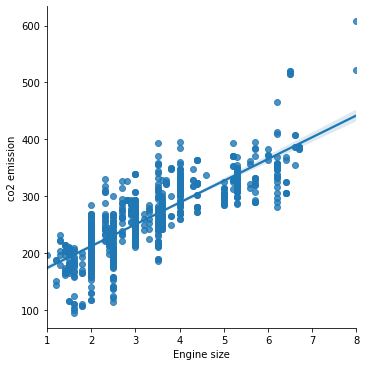

In [18]:
sns.lmplot('Engine_Size', 'CO2_Emissions', df)

plt.xlabel("Engine size")
plt.ylabel("co2 emission");

In [19]:
df.columns

Index(['Make', 'Model', 'Vehicle_Class', 'Engine_Size', 'Cylinders',
       'Transmission', 'Fuel_Consumption_in_City(L/100 km)',
       'Fuel_Consumption_in_City_Hwy(L/100 km)',
       'Fuel_Consumption_comb(L/100km)', 'CO2_Emissions', 'Smog_Level'],
      dtype='object')

In [20]:
df.drop('Smog_Level',inplace=True,axis=1)

In [21]:
df.drop('Model',inplace=True,axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Make                                    935 non-null    object 
 1   Vehicle_Class                           935 non-null    object 
 2   Engine_Size                             935 non-null    float64
 3   Cylinders                               935 non-null    int64  
 4   Transmission                            935 non-null    object 
 5   Fuel_Consumption_in_City(L/100 km)      935 non-null    float64
 6   Fuel_Consumption_in_City_Hwy(L/100 km)  935 non-null    float64
 7   Fuel_Consumption_comb(L/100km)          935 non-null    float64
 8   CO2_Emissions                           935 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 65.9+ KB


In [23]:
df = pd.get_dummies(df, columns=['Make','Vehicle_Class','Transmission'])

df.head()

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Make_Acura,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,...,Transmission_AS9,Transmission_AV,Transmission_AV1,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7
0,2.4,4,9.9,7.0,8.6,199,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.5,6,11.1,10.8,11.0,256,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,4,11.0,8.6,9.9,232,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,4,11.3,9.1,10.3,242,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,4,11.2,8.0,9.8,230,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Engine_Size                             935 non-null    float64
 1   Cylinders                               935 non-null    int64  
 2   Fuel_Consumption_in_City(L/100 km)      935 non-null    float64
 3   Fuel_Consumption_in_City_Hwy(L/100 km)  935 non-null    float64
 4   Fuel_Consumption_comb(L/100km)          935 non-null    float64
 5   CO2_Emissions                           935 non-null    int64  
 6   Make_Acura                              935 non-null    uint8  
 7   Make_Alfa Romeo                         935 non-null    uint8  
 8   Make_Aston Martin                       935 non-null    uint8  
 9   Make_Audi                               935 non-null    uint8  
 10  Make_BMW                                935 non-null    uint8 

In [25]:
NUMERIC_FEATURES = ['Engine_Size', 'Cylinders', 'Fuel_Consumption_in_City(L/100 km)',
       'Fuel_Consumption_in_City_Hwy(L/100 km)',
       'Fuel_Consumption_comb(L/100km)']

numeric_df = df[NUMERIC_FEATURES]

numeric_df.describe()

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km)
count,935.000000,935.000000,935.000000,935.000000,935.000000
mean,3.214866,5.716578,12.498610,9.306203,11.060214
std,1.388513,1.977359,3.487271,2.215819,2.867028
min,1.000000,3.000000,4.000000,3.900000,4.000000
25%,2.000000,4.000000,10.100000,7.700000,9.100000
50%,3.000000,6.000000,12.000000,9.000000,10.700000
75%,4.000000,8.000000,14.800000,10.800000,13.100000
max,8.000000,16.000000,30.300000,20.900000,26.100000


In [26]:
from sklearn.preprocessing import scale

numeric_array = scale(numeric_df)

numeric_array[:5]

array([[-0.5871765 , -0.86858076, -0.74556881, -1.04134739, -0.85856521],
       [ 0.20546168,  0.14341053, -0.40127601,  0.67451185, -0.02101344],
       [-0.87540857, -0.86858076, -0.42996708, -0.31888034, -0.40489134],
       [-0.87540857, -0.86858076, -0.34389388, -0.09310939, -0.26529938],
       [-0.87540857, -0.86858076, -0.37258495, -0.58980548, -0.43978933]])

In [27]:
numeric_df = pd.DataFrame(numeric_array, columns=numeric_df.columns)

numeric_df.describe()

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km)
count,9.350000e+02,9.350000e+02,9.350000e+02,9.350000e+02,9.350000e+02
mean,3.039755e-17,-1.063914e-16,-3.343731e-16,6.535473e-16,5.015596e-16
std,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00
min,-1.595989e+00,-1.374576e+00,-2.438342e+00,-2.441127e+00,-2.463873e+00
25%,-8.754086e-01,-8.685808e-01,-6.881867e-01,-7.252681e-01,-6.840753e-01
50%,-1.548284e-01,1.434105e-01,-1.430564e-01,-1.382636e-01,-1.257074e-01
75%,5.657518e-01,1.155402e+00,6.602934e-01,6.745118e-01,7.118444e-01
max,3.448072e+00,5.203367e+00,5.107409e+00,5.235085e+00,5.248583e+00


In [28]:
df.drop(NUMERIC_FEATURES, inplace=True, axis=1)

df.head()

,CO2_Emissions,Make_Acura,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Bugatti,Make_Buick,Make_Cadillac,...,Transmission_AS9,Transmission_AV,Transmission_AV1,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7
0,199,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,256,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,232,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,242,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,230,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df.shape,numeric_df.shape

((935, 77), (935, 5))

In [30]:
df = pd.concat([df, numeric_df], axis=1)

df.shape

(935, 82)

In [31]:
df.to_csv('co2emission_processed_ds.csv', index=False)

In [32]:
!ls 

CO2_emission.csv
co2 emission.ipynb
co2emission_processed_ds.csv


In [33]:
from sklearn.model_selection import train_test_split

X = df.drop('CO2_Emissions', axis=1)
Y = df['CO2_Emissions']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [34]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(x_train, y_train)

LinearRegression()

In [35]:
y_prediction = linear_regression.predict(x_test)

y_prediction

array([227.7890625 , 208.01171875, 204.85546875, 254.546875  ,
       364.77734375, 328.2109375 , 269.30078125, 190.3671875 ,
       322.36328125, 276.01953125, 382.25      , 156.9921875 ,
       374.54296875, 237.72265625, 211.34765625, 221.859375  ,
       284.95703125, 222.83984375, 420.09375   , 285.375     ,
       340.64453125, 213.37109375, 248.8828125 , 263.51171875,
       228.98828125, 376.546875  , 253.91015625, 262.87109375,
       274.49609375, 176.94921875, 326.02734375, 206.47265625,
       219.546875  , 115.79296875, 311.6875    , 263.58203125,
       280.23828125, 231.29296875, 177.79296875, 120.74609375,
       298.14453125, 216.89453125, 317.91796875, 290.8203125 ,
       344.82421875, 257.7109375 , 199.6328125 , 360.06640625,
       212.89453125, 309.96484375, 240.28125   , 188.2890625 ,
       284.95703125, 206.53515625, 243.984375  , 387.078125  ,
       266.41015625, 361.390625  , 276.4921875 , 238.703125  ,
       197.92578125, 285.4296875 , 348.3359375 , 212.73

In [36]:
train_score = linear_regression.score(x_train, y_train)

print("Training score : ", train_score)

Training score :  0.9624936470027167


In [37]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_prediction)

print("Testing score : ", score)

Testing score :  0.9456791759784451


## Regression models

In [61]:
from sklearn.linear_model import LinearRegression
def linear_model(x_train,y_train):
    print("Linear regression")
    linear_regressor=LinearRegression()
    linear_regressor.fit(x_train,y_train)
    return linear_regressor


In [62]:
from sklearn.linear_model import Lasso
def lasso(x_train,y_train):
    print("Lasso regression")
    lasso_regressor=Lasso(alpha=0.8,max_iter=10000)
    lasso_regressor.fit(x_train,y_train)
    return lasso_regressor


In [63]:
from sklearn.linear_model import Ridge
def ridge(x_train,y_train):
    print("Ridge Regression")
    ridge_regressor=Ridge(alpha=0.9)
    ridge_regressor.fit(x_train,y_train)
    return ridge_regressor


In [64]:
def build_and_train_model(data,target,reg_fn):
    X=data.drop(target,axis=1)
    Y=data[target]
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
    model=reg_fn(x_train,y_train)
    y_pred=model.predict(x_test)
    score=model.score(x_train,y_train)
    print("training score: ",score)
    r_score=r2_score(y_test,y_pred)
    print("testing score:",r_score)
    
    return {
        'model':model,
        'x_train' : x_train, 'x_test' : x_test,
        'y_train' : y_train, 'y_test' : y_test, 
        'y_pred' : y_pred
    }

In [65]:
linearModel=build_and_train_model(df,'CO2_Emissions',linear_model)

Linear regression
training score:  0.9624936470027167
testing score: 0.9456791759784451


In [66]:
ridge_model=build_and_train_model(df,'CO2_Emissions',ridge)

Ridge Regression
training score:  0.9620537608068291
testing score: 0.9463650539135784


In [67]:
lasso_model=build_and_train_model(df,'CO2_Emissions',lasso)

Lasso regression
training score:  0.9522844970070222
testing score: 0.9288700519595127


In [68]:
from sklearn.linear_model import SGDRegressor
def sgd(x_train,y_train):
    print("SGD regression")
    sgd_regressor=SGDRegressor(max_iter=1000)
    sgd_regressor.fit(x_train,y_train)
    return sgd_regressor


In [70]:
sgd_model=build_and_train_model(df,'CO2_Emissions',sgd)

SGD regression
training score:  0.9601841253815508
testing score: 0.9442105857484003
